In [1]:
# Used to display all the matplotlib graphs inside the notebook
%matplotlib inline 

# Hiding the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set() # Setting the default seaborn style for all the plots

## 1) Reading the data 

In [4]:
data = pd.read_csv('Data - Parkinsons.csv') # Storing the given data into a data frame called as "data"

# Exploratory Data Analysis

## 2)  Number of records, structure of the file, number of attributes

In [5]:
data.shape # The data has got 195 rows and 24 columns

(195, 24)

In [6]:
data.head() # Checking the head of the data frame

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
# Checking for duplicates and removing the duplicates

print('The shape before removing the duplicates from the data set is :',data.shape)
data = data.drop_duplicates()
print('The shape after removing the duplicates from the data set is :',data.shape)

The shape before removing the duplicates from the data set is : (195, 24)
The shape after removing the duplicates from the data set is : (195, 24)


In [8]:
data.info() # Checking for the data type of each of the variables and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
data.nunique() # Getting a count of number of unique values in each column so as to identify the continuous and discrete variables

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [10]:
# This will be used in the later part for comparing the predictions with the actual values
X_with_names = data.drop('status',axis=1)
cols = X_with_names.columns.to_list()
cols

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [11]:
data = data.drop('name', axis=1) # Dropping the 'name' column as it will not play a major role in prediction

In [12]:
data.shape # Checking the shape of the data after removing the 'name' column

(195, 23)

In [13]:
data.head() # Glimpse of the data frame after removing the 'name' column

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
data.nunique()
# Finding out the number of unique records under each of the variables to get an idea of continuous and categorical variables
# All the variables, except 'status' are continuous predictors
# 'status' is a categorical variable (target variable)

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

## The five point summary of the continuous variables

In [15]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [16]:
corr = data.corr() # Finding the correlation between the variables

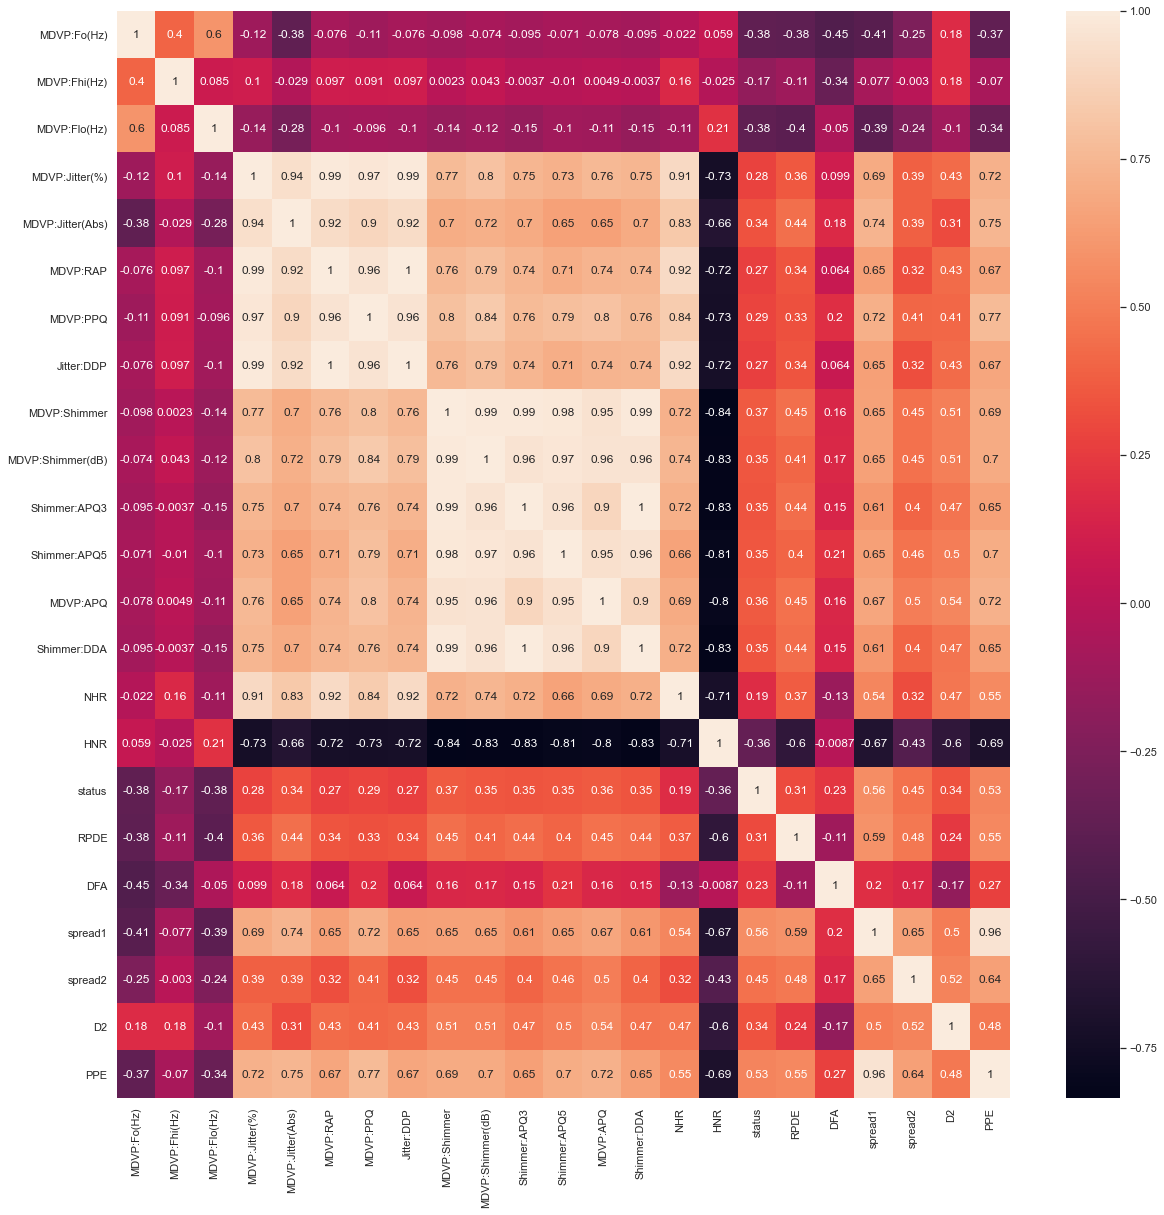

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True,ax=ax)

## Observing the distribution of the target variable

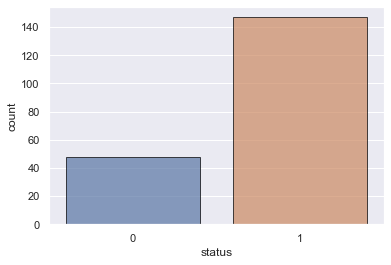

In [18]:
sns.countplot(data['status'],edgecolor = 'black', alpha = 0.7)

In [19]:
grouped_data = data.groupby('status').size()
print(grouped_data)

status
0     48
1    147
dtype: int64


In [20]:
from scipy import stats
print('The skewness of status is :',stats.skew(data['status']))

The skewness of status is : -1.1785714285714286


### - We can see that most of the patients (147) have Parkinson's Disorder. 
### - We can see that the data is skewed more towards the left.

## Distributions of the predictors (continuous)

In [21]:
X = data.drop('status',axis=1)

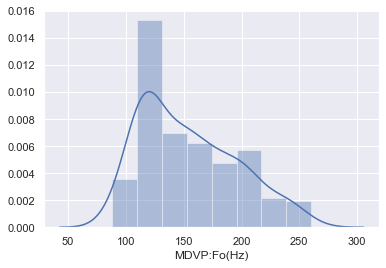

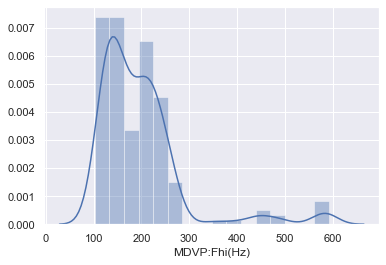

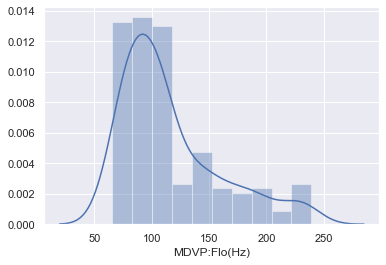

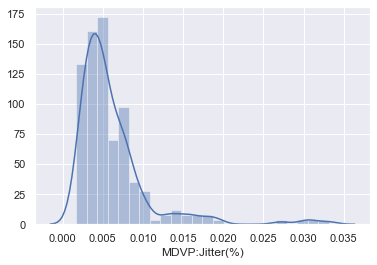

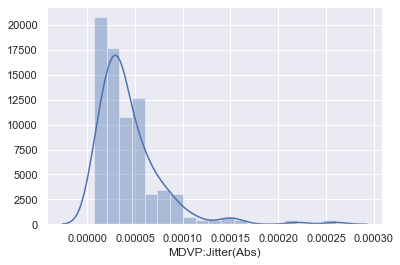

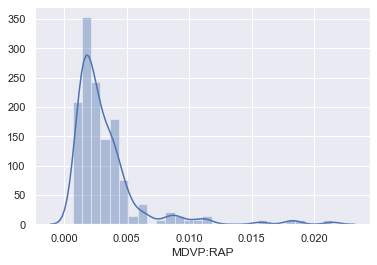

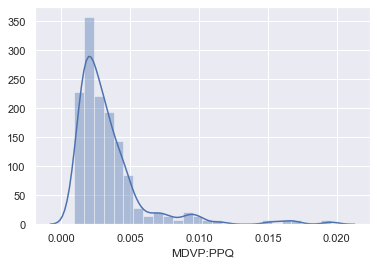

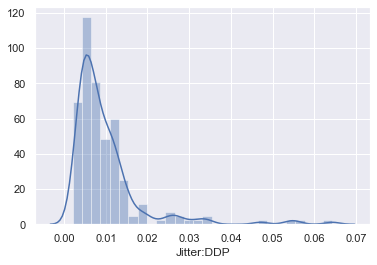

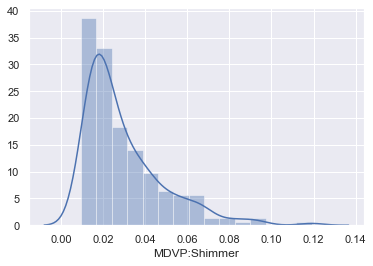

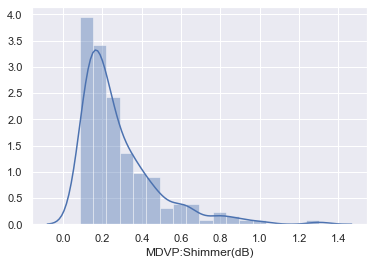

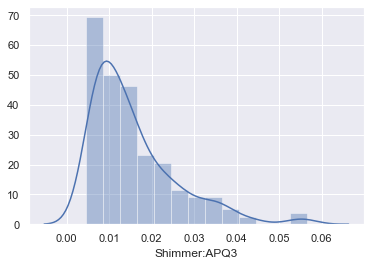

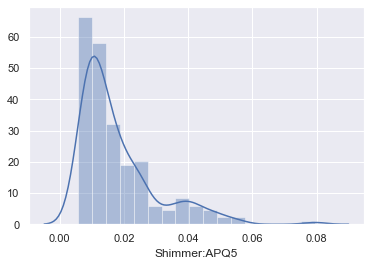

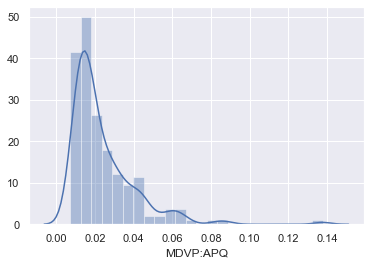

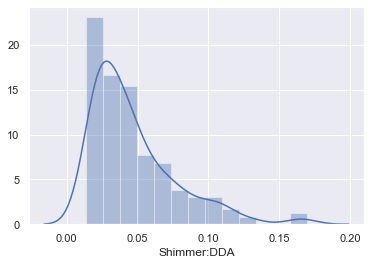

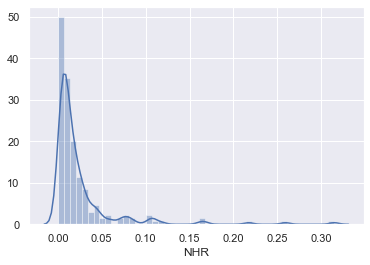

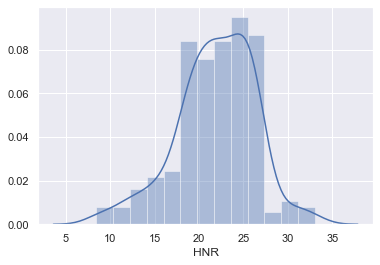

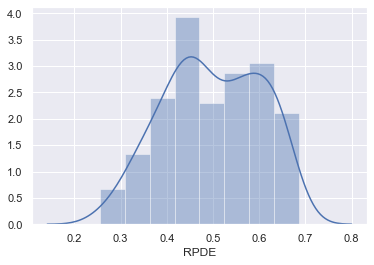

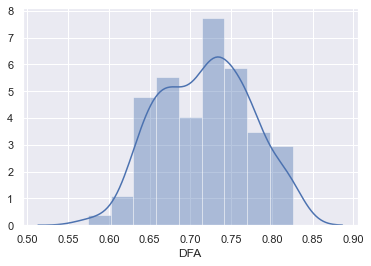

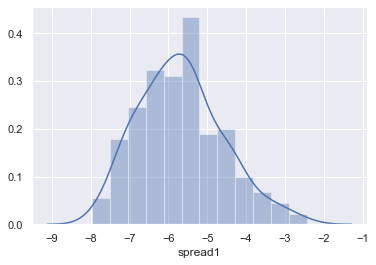

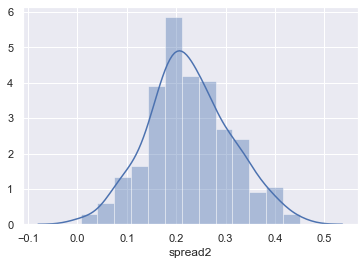

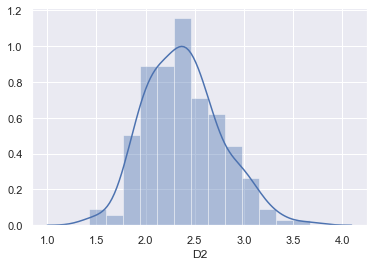

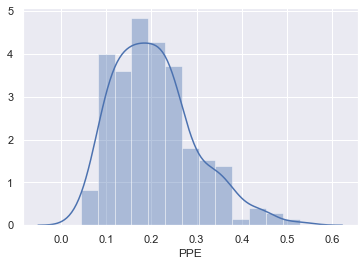

In [22]:
c_cols = X.columns.to_list()
for column in c_cols :
    plt.close()
    sns.distplot(data[column])
    plt.show()

### 1) MDVP:Fhi(Hz), RPDE and DFA have bi-modal tendency.
### 2) NHR is normally distributed but extremely skewed. This might not be a good predictor as the model might not be able to learn much.
### 3) Rest of the variables have normal distributions with skewness values specified below.

In [23]:
# Checking for the skewness is the predictors

from scipy import stats
skews = []
for i in c_cols:
    skew = stats.skew(data[i])
    skews.append(skew)
for i in range(len(skews)) :
    print('The skewness of ',c_cols[i],'is: ',skews[i])

The skewness of  MDVP:Fo(Hz) is:  0.5871758758264713
The skewness of  MDVP:Fhi(Hz) is:  2.522549093638815
The skewness of  MDVP:Flo(Hz) is:  1.2079661332354685
The skewness of  MDVP:Jitter(%) is:  3.0611649573863318
The skewness of  MDVP:Jitter(Abs) is:  2.6286502455329943
The skewness of  MDVP:RAP is:  3.334801409433697
The skewness of  MDVP:PPQ is:  3.050196424967616
The skewness of  Jitter:DDP is:  3.33614099997415
The skewness of  MDVP:Shimmer is:  1.6536338401467412
The skewness of  MDVP:Shimmer(dB) is:  1.9839757449583963
The skewness of  Shimmer:APQ3 is:  1.568392027161109
The skewness of  Shimmer:APQ5 is:  1.7848312643056594
The skewness of  MDVP:APQ is:  2.597864496190539
The skewness of  Shimmer:DDA is:  1.5684333201651859
The skewness of  NHR is:  4.188172511855342
The skewness of  HNR is:  -0.5103527250427248
The skewness of  RPDE is:  -0.14229695276961832
The skewness of  DFA is:  -0.03295762313006091
The skewness of  spread1 is:  0.42880765790399306
The skewness of  sprea

### All the variables are skewed towards the right-hand side, except HNR, RPDE and DFA, that are skewed towards the left-hand side.

## 3) Using univariate & bivariate analysis to check the individual attributes for
## their basic statistics
## - Relationship between the target variable and each of the continuous variables(predictors)

### ------------------------------------------OUTLIER TREATMENT------------------------------------------

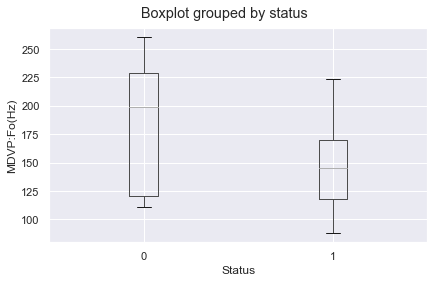

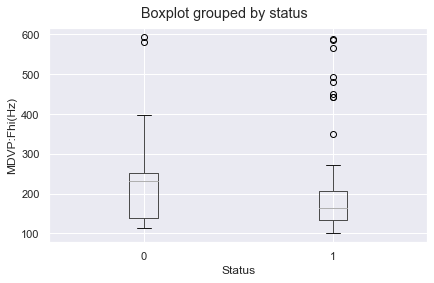

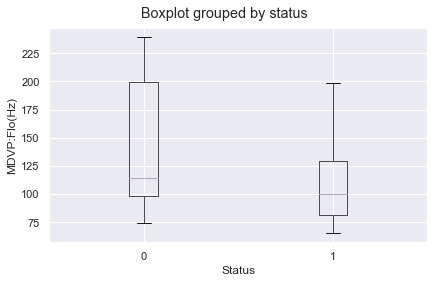

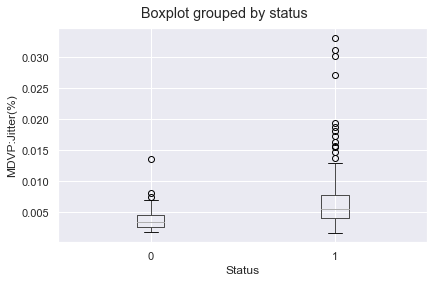

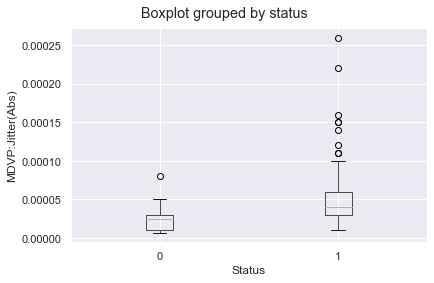

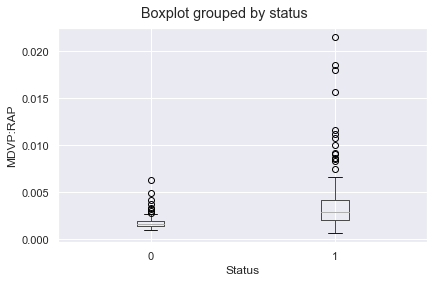

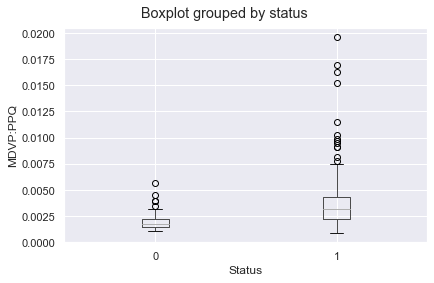

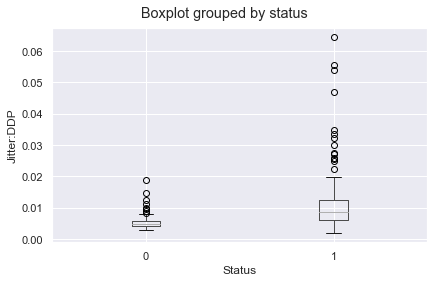

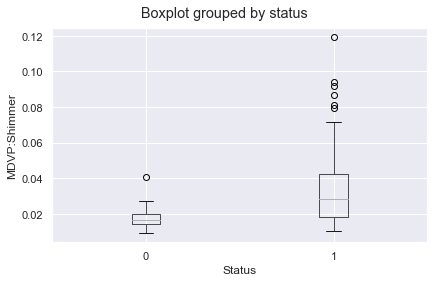

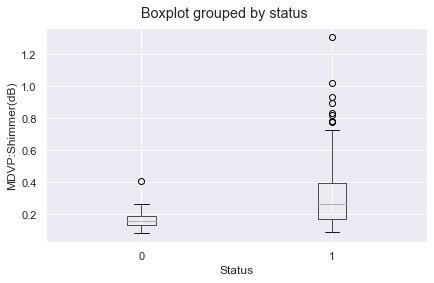

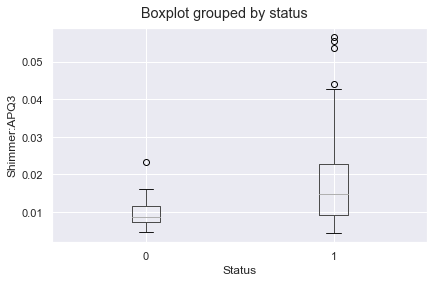

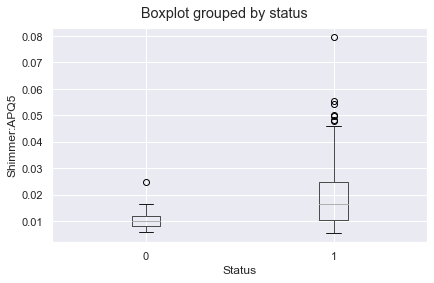

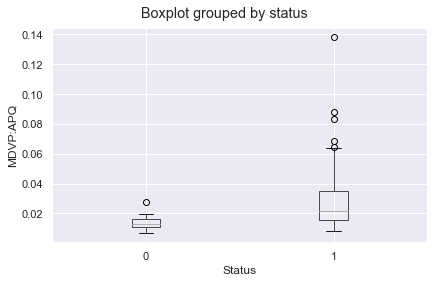

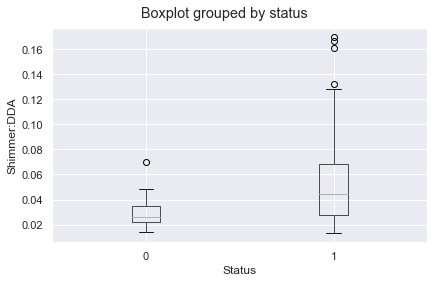

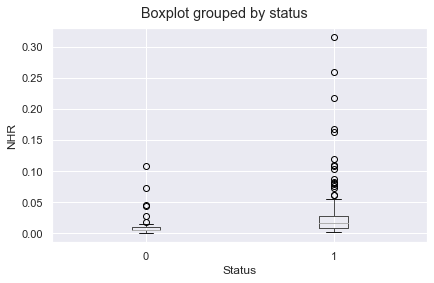

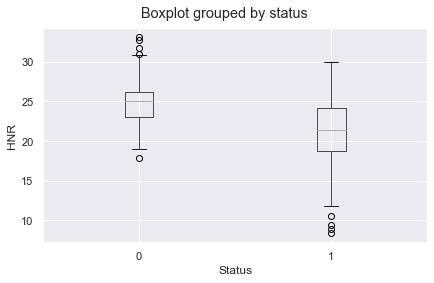

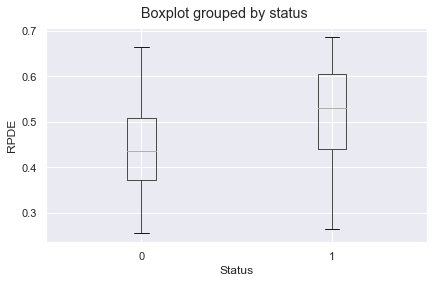

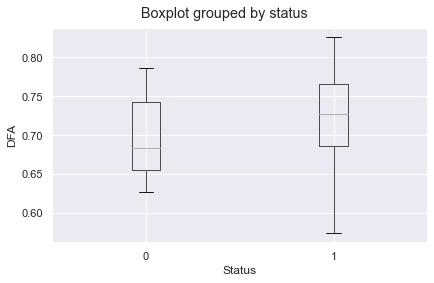

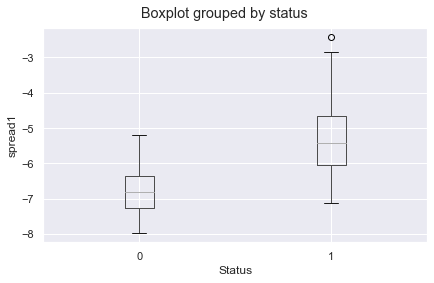

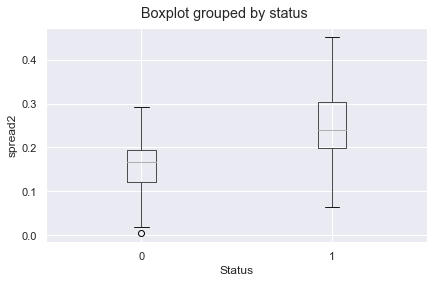

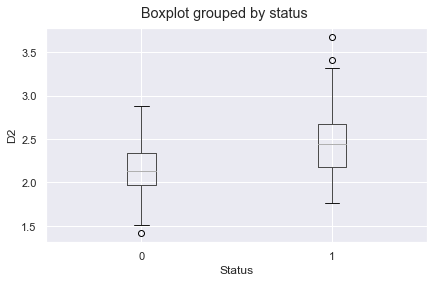

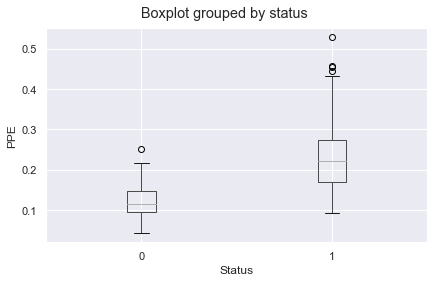

In [24]:
# Using boxplots to find out the outliers (Bivariate Analysis)

for i in c_cols:    
    data.boxplot(i,by='status')
    plt.tight_layout()
    plt.title('',y=1.08)
    plt.xlabel('Status')
    plt.ylabel(i)

### -I have replaced only the extreme points among the outliers with a logical value (the max value of that variable for that particular class(0 or 1))

#### Outlier treatment for 'MDVP:Fhi(Hz)'

In [25]:
value1 = data['MDVP:Fhi(Hz)'].max()

In [26]:
value2 = data[(data['MDVP:Fhi(Hz)']<value1) & (data['status']==0)]['MDVP:Fhi(Hz)'].max() 

In [27]:
value2

581.289

In [28]:
value = data[(data['MDVP:Fhi(Hz)']<value2) & (data['status']==0)]['MDVP:Fhi(Hz)'].max() 

In [29]:
value

396.961

In [30]:
data['MDVP:Fhi(Hz)'][data['MDVP:Fhi(Hz)']>=value2]=value # Replacing the outlier with the logical value

#### Outlier treatment for 'MDVP:Jitter(%)'

In [31]:
value1 = data[data['status']==0]['MDVP:Jitter(%)'].max() 
value1

0.0136

In [32]:
value2 = data[(data['status']==0) & (data['MDVP:Jitter(%)']<value1)]['MDVP:Jitter(%)'].max() 
value2

0.008029999999999999

In [33]:
value3 = data[(data['status']==0) & (data['MDVP:Jitter(%)']<value2)]['MDVP:Jitter(%)'].max() 
value3

0.0074

In [34]:
value = data[(data['status']==0) & (data['MDVP:Jitter(%)']<value3)]['MDVP:Jitter(%)'].max() 
value

0.006940000000000001

In [35]:
data['MDVP:Jitter(%)'][(data['MDVP:Jitter(%)']>=value) & (data['status']==0)]=value

In [36]:
value = data[(data['status']==1) & (data['MDVP:Jitter(%)']<0.025)]['MDVP:Jitter(%)'].max() 
value

0.01936

In [37]:
data['MDVP:Jitter(%)'][(data['MDVP:Jitter(%)']>0.025) & (data['status']==1)]=value

#### Outlier treatment for 'MDVP:Jitter(Abs)'

In [38]:
value1 = data[data['status']==0]['MDVP:Jitter(Abs)'].max() 
value1

8e-05

In [39]:
value = data[(data['status']==0) & (data['MDVP:Jitter(Abs)']<value1)]['MDVP:Jitter(Abs)'].max() 
value

5e-05

In [40]:
data['MDVP:Jitter(Abs)'][(data['MDVP:Jitter(Abs)']>=value) & (data['status']==0)]=value

In [41]:
value = data[(data['status']==1) & (data['MDVP:Jitter(Abs)']<0.0002)]['MDVP:Jitter(Abs)'].max() 
value

0.00016

In [42]:
data['MDVP:Jitter(Abs)'][(data['MDVP:Jitter(Abs)']>value1) & (data['status']==1)]=value

In [43]:
value2 = data['MDVP:Jitter(Abs)'].max()
value2

0.00016

In [44]:
value = data[data['MDVP:Jitter(Abs)']<value2]['MDVP:Jitter(Abs)'].max()
value

8e-05

In [45]:
data['MDVP:Jitter(Abs)'][(data['MDVP:Jitter(Abs)']>=value2) & (data['status']==1)]=value

#### Outlier treatment for 'MDVP:Shimmer'

In [46]:
value1 = data[data['status']==0]['MDVP:Shimmer'].max() 
value1

0.04087

In [47]:
value = data[(data['status']==0) & (data['MDVP:Shimmer']<value1)]['MDVP:Shimmer'].max() 
value

0.027510000000000003

In [48]:
data['MDVP:Shimmer'][(data['MDVP:Shimmer']>=value1) & (data['status']==0)]=value

In [49]:
value = data[(data['status']==1) & (data['MDVP:Shimmer']<0.1)]['MDVP:Shimmer'].max()
value

0.09419

In [50]:
data['MDVP:Shimmer'][(data['MDVP:Shimmer']>=value) & (data['status']==1)]=value

#### Outlier treatment for 'Jitter:DDP'

In [51]:
value = data[(data['status']==1) & (data['Jitter:DDP']<0.04)]['Jitter:DDP'].max()
value

0.03476

In [52]:
data['Jitter:DDP'][(data['Jitter:DDP']>0.04) & (data['status']==1)]=value

#### Outlier treatment for 'MDVP:Shimmer(dB)'

In [53]:
value1 = data[(data['status']==0)]['MDVP:Shimmer(dB)'].max()
value1

0.405

In [54]:
value = data[(data['status']==0) & (data['MDVP:Shimmer(dB)']<value1)]['MDVP:Shimmer(dB)'].max()
value

0.263

In [55]:
data['MDVP:Shimmer(dB)'][(data['MDVP:Shimmer(dB)']>value) & (data['status']==0)]=value

In [56]:
value = data[(data['status']==1) & (data['MDVP:Shimmer(dB)']<1.2)]['MDVP:Shimmer(dB)'].max()
value

1.018

In [57]:
data['MDVP:Shimmer(dB)'][(data['MDVP:Shimmer(dB)']>value) & (data['status']==1)]=value

#### Outlier treatment for 'Shimmer:APQ3'

In [58]:
value = data[(data['status']==0) & (data['Shimmer:APQ3']<0.02)]['Shimmer:APQ3'].max()
value

0.016040000000000002

In [59]:
data['Shimmer:APQ3'][(data['Shimmer:APQ3']>value) & (data['status']==0)]=value

In [60]:
value1 = data[(data['status']==1) & (data['Shimmer:APQ3']<0.05)]['Shimmer:APQ3'].max()
value1

0.04421

In [61]:
value = data[(data['status']==1) & (data['Shimmer:APQ3']<value1)]['Shimmer:APQ3'].max()
value

0.042839999999999996

In [62]:
data['Shimmer:APQ3'][(data['Shimmer:APQ3']>=value) & (data['status']==1)]=value

#### Outlier treatment for 'Shimmer:APQ5'

In [63]:
value = data[(data['status']==0) & (data['Shimmer:APQ5']<0.02)]['Shimmer:APQ5'].max()
value

0.016569999999999998

In [64]:
data['Shimmer:APQ5'][(data['Shimmer:APQ5']>value) & (data['status']==0)]=value

In [65]:
value = data[(data['status']==1) & (data['Shimmer:APQ5']<0.07)]['Shimmer:APQ5'].max()
value

0.055560000000000005

In [66]:
data['Shimmer:APQ5'][(data['Shimmer:APQ5']>value) & (data['status']==1)]=value

#### Outlier treatment for 'PPE'

In [67]:
value1 = data[data['status']==0]['PPE'].max()
value1

0.252404

In [68]:
value = data[(data['status']==0) & (data['PPE']<value1)]['PPE'].max()
value

0.21572399999999997

In [69]:
data['PPE'][(data['PPE']>value) & (data['status']==0)]=value

In [70]:
value1 = data[data['status']==1]['PPE'].max()
value1

0.527367

In [71]:
value2 = data[(data['status']==1) & (data['PPE']<value1)]['PPE'].max()
value2

0.45753299999999997

In [72]:
value3 = data[(data['status']==1) & (data['PPE']<value2)]['PPE'].max()
value3

0.454721

In [73]:
value = data[(data['status']==1) & (data['PPE']<value3)]['PPE'].max()
value

0.444774

In [74]:
data['PPE'][(data['PPE']>value) & (data['status']==1)]=value

In [75]:
value = data[(data['status']==1) & (data['PPE']<data['PPE'].max())]['PPE'].max()
value

0.430788

In [76]:
data['PPE'][(data['PPE']>value) & (data['status']==1)]=value

#### Outlier treatment for 'MDVP:RAP'

In [77]:
value = data[(data['MDVP:RAP']<0.015)]['MDVP:RAP'].max()
value

0.011590000000000001

In [78]:
data['MDVP:RAP'][(data['MDVP:RAP']>value) & (data['status']==1)]=value

In [79]:
#### Outlier treatment for 'MDVP:PPQ'

In [80]:
value = data[(data['MDVP:PPQ']<0.0125)]['MDVP:PPQ'].max()
value

0.01154

In [81]:
data['MDVP:PPQ'][(data['MDVP:PPQ']>value) & (data['status']==1)]=value

#### Outlier treatment for 'MDVP:APQ'

In [82]:
value = data[(data['MDVP:APQ']<0.02) & (data['status']==0)]['MDVP:APQ'].max()
value

0.01949

In [83]:
data['MDVP:APQ'][(data['MDVP:APQ']>value) & (data['status']==0)]=value

In [84]:
value = data[(data['MDVP:APQ']<0.08) & (data['status']==1)]['MDVP:APQ'].max()
value

0.06824

In [85]:
data['MDVP:APQ'][(data['MDVP:APQ']>value) & (data['status']==1)]=value

#### Outlier treatment for 'Shimmer:DDA'

In [86]:
value = data[(data['Shimmer:DDA']<0.06) & (data['status']==0)]['Shimmer:DDA'].max()
value

0.048119999999999996

In [87]:
data['Shimmer:DDA'][(data['Shimmer:DDA']>value) & (data['status']==0)]=value

In [88]:
value = data[(data['Shimmer:DDA']<0.14) & (data['status']==1)]['Shimmer:DDA'].max()
value

0.13262000000000002

In [89]:
data['Shimmer:DDA'][(data['Shimmer:DDA']>value) & (data['status']==1)]=value

#### Outlier treatment for 'NHR'

In [90]:
value = data[(data['NHR']<0.2) & (data['status']==1)]['NHR'].max()
value

0.16744

In [91]:
data['NHR'][(data['NHR']>value) & (data['status']==1)]=value

In [92]:
value = data[(data['NHR']<0.125) & (data['status']==1)]['NHR'].max()
value

0.11843

In [93]:
data['NHR'][(data['NHR']>value) & (data['status']==1)]=value

In [94]:
value = data[(data['NHR']<0.05) & (data['status']==0)]['NHR'].max()
value

0.044410000000000005

In [95]:
data['NHR'][(data['NHR']>value) & (data['status']==0)]=value

## Plotting the boxplots after outlier treatment

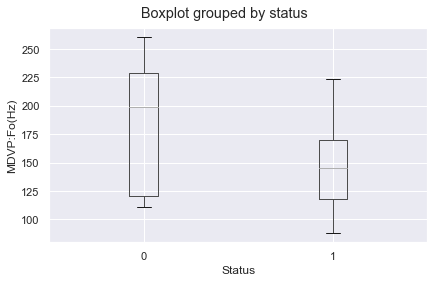

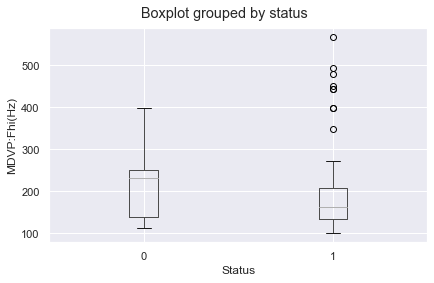

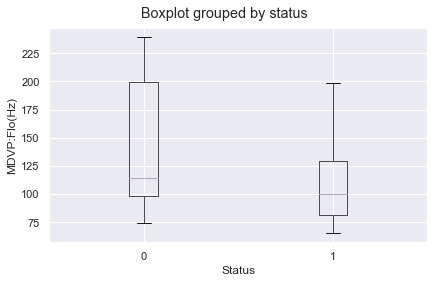

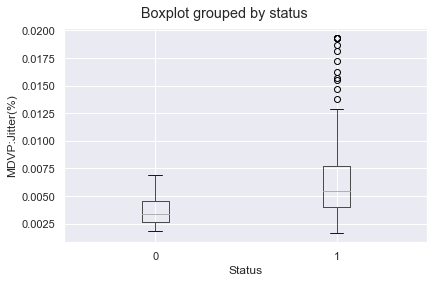

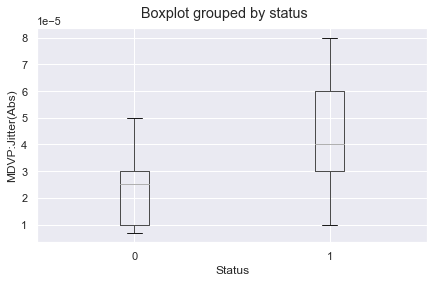

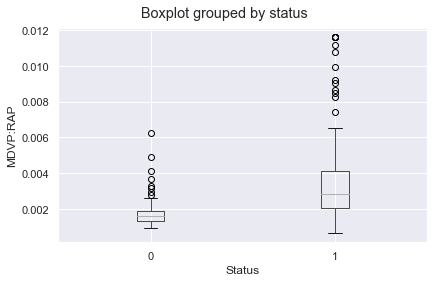

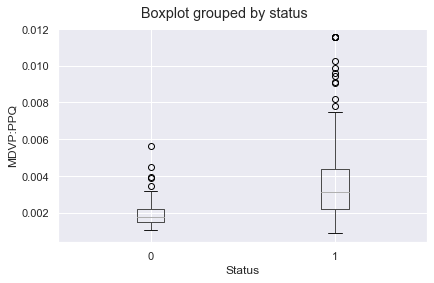

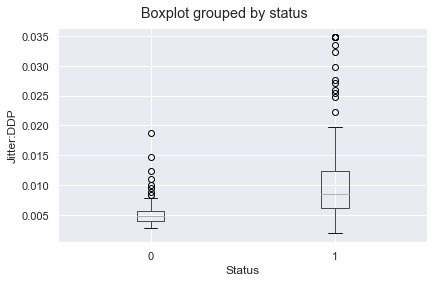

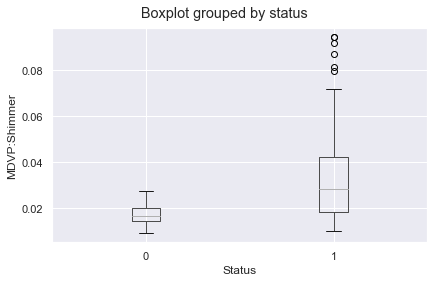

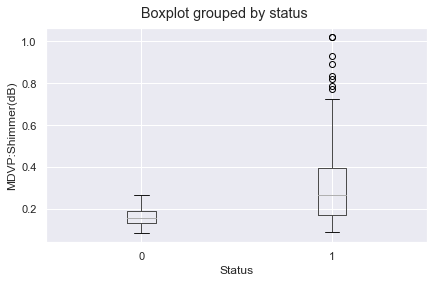

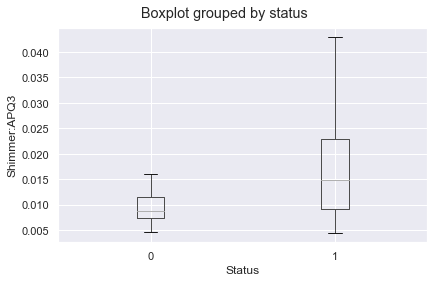

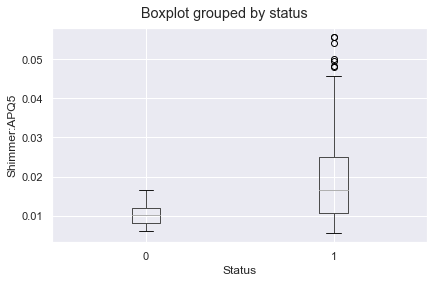

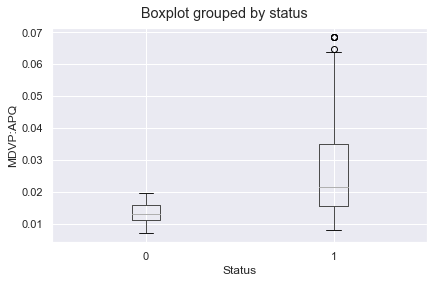

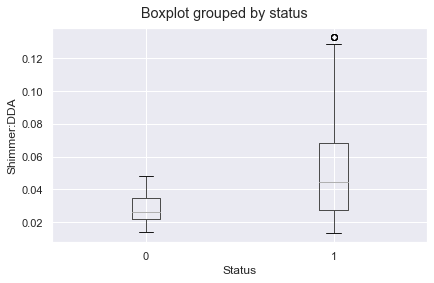

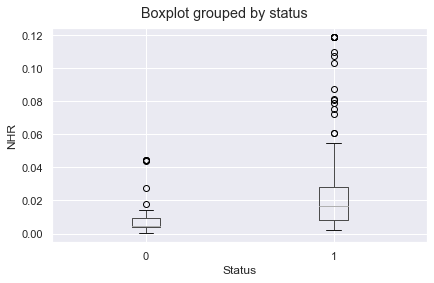

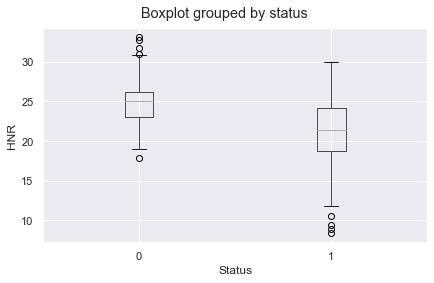

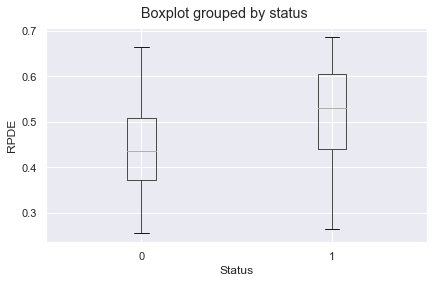

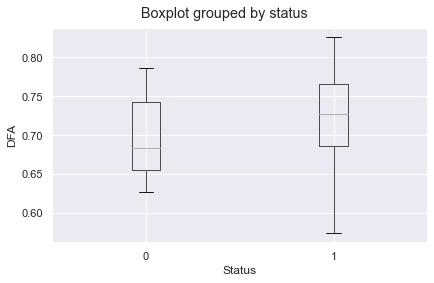

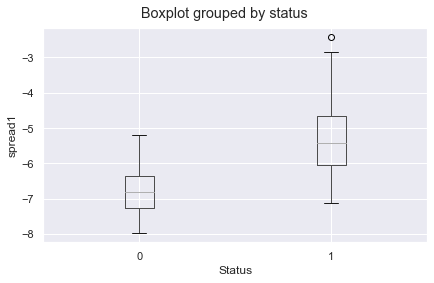

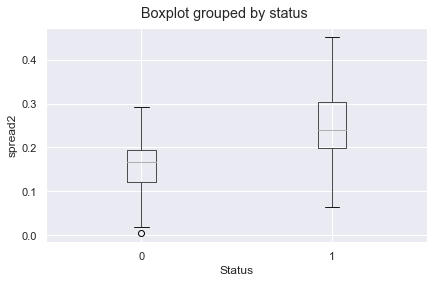

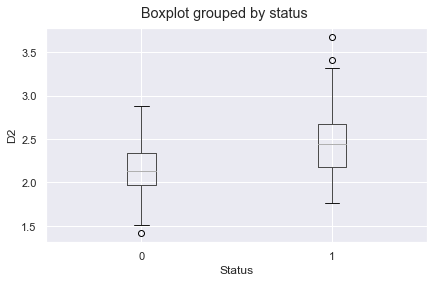

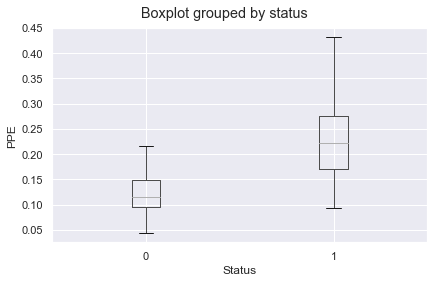

In [96]:
for i in c_cols:    
    data.boxplot(i,by='status')
    plt.tight_layout()
    plt.title('',y=1.08)
    plt.xlabel('Status')
    plt.ylabel(i)

### -The outliers are still present but there are no extreme points as such.

## Feature Selection using statistical tests

## ANOVA test (Categorical vs Continuous)

H0 : There is NO relation between the given variables (p > 0.05)

H1 : There is a relation between the given variables (p <= 0.05)


In [97]:
from scipy.stats import f_oneway
anova = []
for i in c_cols :
    l = data.groupby('status')[i].apply(list)
    res = f_oneway(*l)
    anova.append(i +':'+str(res[1]))
for i in anova:
    print(i)

MDVP:Fo(Hz):3.121919402836332e-08
MDVP:Fhi(Hz):0.020356547713834963
MDVP:Flo(Hz):4.1970041821535477e-08
MDVP:Jitter(%):1.26940119372406e-06
MDVP:Jitter(Abs):1.619519499958499e-10
MDVP:RAP:1.3790255871824791e-05
MDVP:PPQ:3.764857884360087e-06
Jitter:DDP:1.3763392752908567e-05
MDVP:Shimmer:3.9056401127410876e-08
MDVP:Shimmer(dB):1.4299717384051594e-07
Shimmer:APQ3:1.2105882732161738e-07
Shimmer:APQ5:1.2218339704117706e-07
MDVP:APQ:3.0404915547555505e-09
Shimmer:DDA:1.3777576001651188e-07
NHR:0.0002150042828325986
HNR:2.074677359679702e-07
RPDE:1.1398962455333769e-05
DFA:0.001115115879842905
spread1:7.909650873104612e-18
spread2:2.3917287623712665e-11
D2:1.1359246053142801e-06
PPE:1.9345986921416614e-16


###  -By looking at the p-values for each of the variables, all the variables have importance. So, we do not have to drop any.

## Checking for null values in each of the columns

In [98]:
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### -There are no null values present in the data set

## Saving the dataframe as a pickle file so that the data can be loaded quickly and used in the models

In [99]:
data.to_pickle('Parkinsons_data.pickle')

In [100]:
parkinsons_data = pd.read_pickle('Parkinsons_data.pickle')
parkinsons_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00008,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00008,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00008,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## -The data has been processed and can be used in the models. 

# --------------------------------------------------------------------------------------------------------------

# Machine Learning

In [101]:
# Separating the target variable from the predictor variables

x = parkinsons_data.drop('status',axis=1).values
y = parkinsons_data[['status']].values
y = y.reshape(len(y),1)

print('The shape of X is: ',x.shape)
print('The shape of y is: ',y.shape)

The shape of X is:  (195, 22)
The shape of y is:  (195, 1)


## 4) Converting the features into their z-scores (Scaling)

In [102]:
from scipy.stats import zscore

X = data.drop('status',axis=1)
X_scaled = X.apply(zscore)
X = X_scaled.values

print('The shape of X is: ',X.shape)
print('The shape of y is: ',y.shape)
X_scaled.head()

The shape of X is:  (195, 22)
The shape of y is:  (195, 1)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.463051,-0.952037,0.495696,1.374470,0.230009,0.979427,0.228595,0.779086,0.778430,...,0.427906,0.667748,0.016756,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.905030
1,-0.770972,-0.574640,-0.057721,0.978921,1.827362,0.639516,1.609883,0.638221,1.742880,1.845259,...,1.391405,1.668135,-0.090362,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.866142
2,-0.909476,-0.800848,-0.109875,1.194271,1.827362,0.980054,1.987269,0.981732,1.249484,1.077142,...,0.854825,1.271551,-0.325871,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.453877
3,-0.909622,-0.713661,-0.114229,1.055082,1.827362,0.799008,1.618763,0.797759,1.391315,1.263837,...,0.980349,1.446916,-0.309157,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.869585
4,-0.925657,-0.663232,-0.130608,1.808807,1.827362,1.458530,2.551128,1.460347,1.902235,1.621225,...,1.458305,2.041617,-0.151898,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.342705


## 5) Splitting the data into training and test set in the ratio of 70:30 respectively 

In [103]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print('The shape of X_train is: ',X_train.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (136, 22)
The shape of y_train is:  (136, 1)
The shape of X_test is:  (59, 22)
The shape of y_test is:  (59, 1)


In [104]:
X_train_with_names,X_test_with_names,y_train,y_test = train_test_split(X_with_names,y,test_size=0.3,random_state=42)

print('The shape of X_train is: ',X_train_with_names.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of X_test is: ',X_test_with_names.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (136, 23)
The shape of y_train is:  (136, 1)
The shape of X_test is:  (59, 23)
The shape of y_test is:  (59, 1)


## 6) Training the Standard Classification Algorithms

## --- LOGISTIC REGRESSION ---

In [105]:
from sklearn.linear_model import LogisticRegression

model_lgr = LogisticRegression(C=1,penalty='l2',solver='newton-cg')
print(model_lgr)

model_lgr = model_lgr.fit(X_train,y_train)
y_pred = model_lgr.predict(X_test)

print()
print('The coefficients are: ',model_lgr.coef_[0])
print()
print('The intercept is: ',model_lgr.intercept_[0])

LogisticRegression(C=1, solver='newton-cg')

The coefficients are:  [-0.38845196 -0.35504233 -0.20049054 -0.50198781 -0.42395203  0.44389894
  0.03427568  0.44322448  0.14194654  0.20624667 -0.16264825  0.35255666
  0.44425352 -0.15613065 -0.23195527  0.10636345 -0.26390629  0.17990458
  0.63765924  0.32881749  1.1968177   0.9559494 ]

The intercept is:  2.527200252036173


### Confusion Matrix and Classification Report

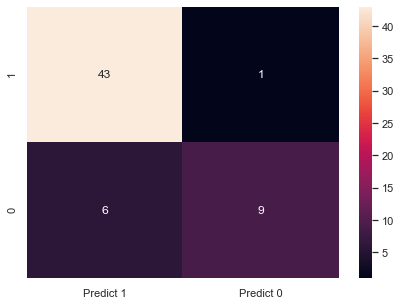

In [106]:
from sklearn import metrics

cm_lgr=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_lgr = pd.DataFrame(cm_lgr, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_lgr, annot=True)

In [107]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



In [108]:
accuracy_lgr = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_lgr = float(accuracy_lgr)*100

In [109]:
print('The Accuracy of the Logistic Regression model is :',accuracy_percentage_lgr,'%')

The Accuracy of the Logistic Regression model is : 87.0 %


In [110]:
score_lgr = model_lgr.score(X_test,y_test)*100
print('The score of the logistic regression model on the test data is: ',score_lgr,'%')

The score of the logistic regression model on the test data is:  88.13559322033898 %


## --- K-NN --- 

In [111]:
from sklearn.neighbors import KNeighborsClassifier

scores = []

for k in range(1,50) :
    
    model_knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    model_knn = model_knn.fit(X_train,y_train)
    
    y_pred = model_knn.predict(X_test)
    
    score = model_knn.score(X_test,y_test)
    scores.append(score)
print(scores)

[0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9152542372881356, 0.9491525423728814, 0.9322033898305084, 0.9152542372881356, 0.8813559322033898, 0.8983050847457628, 0.864406779661017, 0.8813559322033898, 0.864406779661017, 0.8813559322033898, 0.864406779661017, 0.8813559322033898, 0.864406779661017, 0.864406779661017, 0.847457627118644, 0.864406779661017, 0.864406779661017, 0.8813559322033898, 0.8305084745762712, 0.847457627118644, 0.8305084745762712, 0.847457627118644, 0.847457627118644, 0.847457627118644, 0.847457627118644, 0.847457627118644, 0.8305084745762712, 0.847457627118644, 0.847457627118644, 0.847457627118644, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984]


In [112]:
k = scores.index(max(scores))+1
k

1

### Scores for different 'k' values are plotted

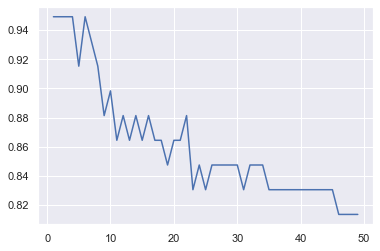

In [113]:
plt.plot(range(1,50),scores)

In [114]:
model_knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
model_knn = model_knn.fit(X_train,y_train)
    
y_pred = model_knn.predict(X_test)

### Confusion Matrix and Classification Report

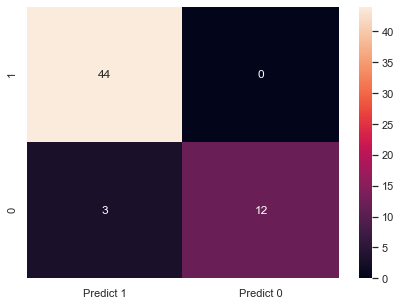

In [115]:
cm_knn=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_knn, annot=True)

In [116]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59



In [117]:
accuracy_knn = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_knn = float(accuracy_knn)*100

In [118]:
print('The Accuracy of the K-NN model is :',accuracy_percentage_knn,'%')

The Accuracy of the K-NN model is : 95.0 %


In [119]:
score_knn = model_knn.score(X_test,y_test)*100
print('The score of the K-NN model on the test data is: ',score_knn,'%')

The score of the K-NN model on the test data is:  94.91525423728814 %


##  --- Naïve Bayes ---

In [120]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
print(model_nb)

model_nb=model_nb.fit(X_train,y_train)
y_pred=model_nb.predict(X_test)


GaussianNB()


### Confusion Matrix and Classification Report 

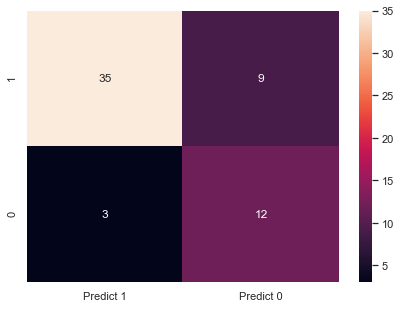

In [121]:
from sklearn import metrics

cm_nb=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_nb = pd.DataFrame(cm_nb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nb, annot=True)

In [122]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.92      0.80      0.85        44

    accuracy                           0.80        59
   macro avg       0.75      0.80      0.76        59
weighted avg       0.83      0.80      0.81        59



In [123]:
accuracy_nb = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_nb = float(accuracy_nb)*100

In [124]:
print('The Accuracy of the Naïve Bayes model is :',accuracy_percentage_nb,'%')

The Accuracy of the Naïve Bayes model is : 81.0 %


In [125]:
score_nb = model_nb.score(X_test,y_test)*100
print('The score of the Naïve Bayes model on the test data is: ',score_nb,'%')

The score of the Naïve Bayes model on the test data is:  79.66101694915254 %


##  --- Support Vector Machines ---

In [126]:
from sklearn import svm
model_svm = svm.SVC(C=20, kernel='rbf', gamma=0.01)

print(model_svm)

model_SVM = model_svm.fit(X_train,y_train)
y_pred = model_SVM.predict(X_test)

SVC(C=20, gamma=0.01)


### Confusion Matrix and Classification report

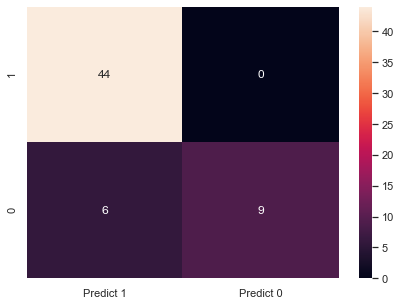

In [127]:
cm_svm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_svm = pd.DataFrame(cm_svm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_svm, annot=True)

In [128]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.88      1.00      0.94        44

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59



In [129]:
accuracy_svm = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_svm = float(accuracy_svm)*100

In [130]:
print('The Accuracy of the SVM model is :',accuracy_percentage_svm,'%')

The Accuracy of the SVM model is : 89.0 %


In [131]:
score_svm = model_svm.score(X_test,y_test)*100
print('The score of the SVM model on the test data is: ',score_svm,'%')

The score of the SVM model on the test data is:  89.83050847457628 %


## --- Decision Tree ---

In [132]:
from sklearn import tree

scores = []

for k in range(1,10) :
    model_dtree = tree.DecisionTreeClassifier(max_depth=k,criterion='entropy')    

    DTree=model_dtree.fit(X_train,y_train)
    y_pred=DTree.predict(X_test)
    score = model_dtree.score(X_test,y_test)
    scores.append(score)

print(scores)

[0.864406779661017, 0.864406779661017, 0.847457627118644, 0.8813559322033898, 0.864406779661017, 0.864406779661017, 0.864406779661017, 0.8983050847457628, 0.8813559322033898]


In [133]:
k = scores.index(max(scores))+1
print('The max_depth value that yields the maximum accuracy is:',scores.index(max(scores))+1)

The max_depth value that yields the maximum accuracy is: 8


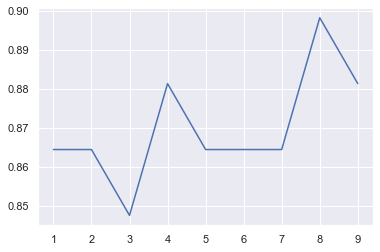

In [134]:
plt.plot(range(1,10),scores)

In [135]:
model_dtree = tree.DecisionTreeClassifier(max_depth=k,criterion='entropy')    

model_dtree=model_dtree.fit(X_train,y_train)
y_pred=model_dtree.predict(X_test)

### Confusion Matrix and Classification Report

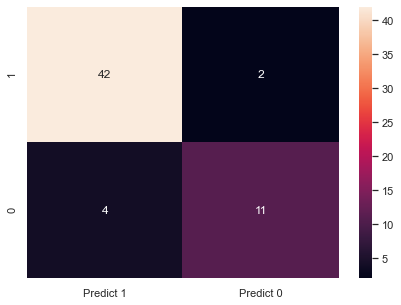

In [136]:
cm_dtree=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_dtree = pd.DataFrame(cm_dtree, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_dtree, annot=True)

In [137]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



In [138]:
accuracy_dtree = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_dtree = float(accuracy_dtree)*100

In [139]:
print('The Accuracy of the Decision Tree model is :',accuracy_percentage_dtree,'%')

The Accuracy of the Decision Tree model is : 90.0 %


In [140]:
score_dtree = model_dtree.score(X_test,y_test)*100
print('The score of the Decision Tree model on the test data is: ',score_dtree,'%')

The score of the Decision Tree model on the test data is:  89.83050847457628 %


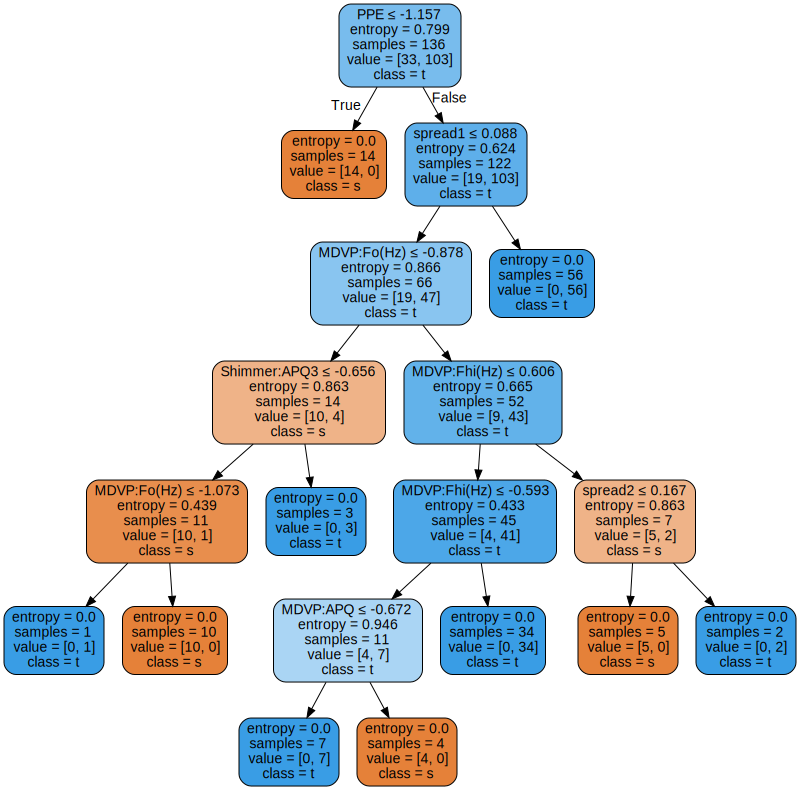

In [141]:
# Plotting the Decision Tree

import graphviz
decision_tree = tree.export_graphviz(model_dtree, out_file=None,feature_names=c_cols,class_names='status',filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(decision_tree)
graph

## 7) Training the Ensemble Models

## --- RANDOM FOREST ---

In [142]:
scores = []
for k in range(1,10) :

    from sklearn.ensemble import RandomForestClassifier
    model_rforest = RandomForestClassifier(max_depth=k, n_estimators=1000,criterion='entropy')

    model_rforest=model_rforest.fit(X_train,y_train)
    y_pred=model_rforest.predict(X_test)
    
    score = model_rforest.score(X_test,y_test)
    scores.append(score)

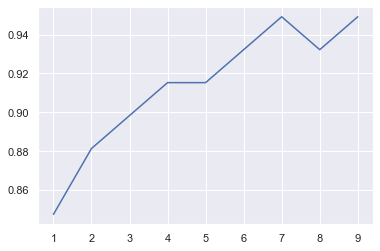

In [143]:
plt.plot(range(1,10),scores)

In [144]:
k = scores.index(max(scores))+1
k

7

In [145]:
model_rforest = RandomForestClassifier(max_depth=k, n_estimators=1000,criterion='entropy')

model_rforest=model_rforest.fit(X_train,y_train)
y_pred=model_rforest.predict(X_test)

### Confusion Matrix and Classification Report

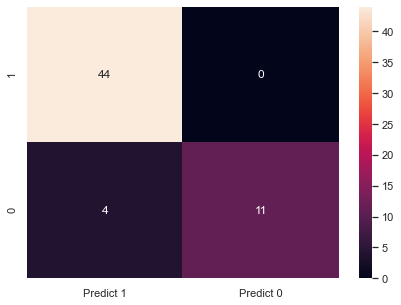

In [146]:
cm_rforest=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_rforest = pd.DataFrame(cm_rforest, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rforest, annot=True)

In [147]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



In [148]:
accuracy_rforest = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_rforest = float(accuracy_rforest)*100

In [149]:
print('The Accuracy of the Random Forest model is :',accuracy_percentage_rforest,'%')

The Accuracy of the Random Forest model is : 93.0 %


In [150]:
score_rforest = model_rforest.score(X_test,y_test)*100
print('The score of the Random Forest model on the test data is: ',score_rforest,'%')

The score of the Random Forest model on the test data is:  93.22033898305084 %


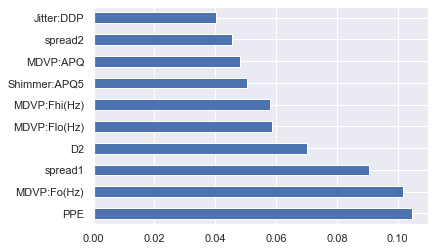

In [151]:
# Finding out the top 10 important features to make the predictions

feature_importances = pd.Series(model_rforest.feature_importances_, index=c_cols)
feature_importances.nlargest(10).plot(kind='barh')

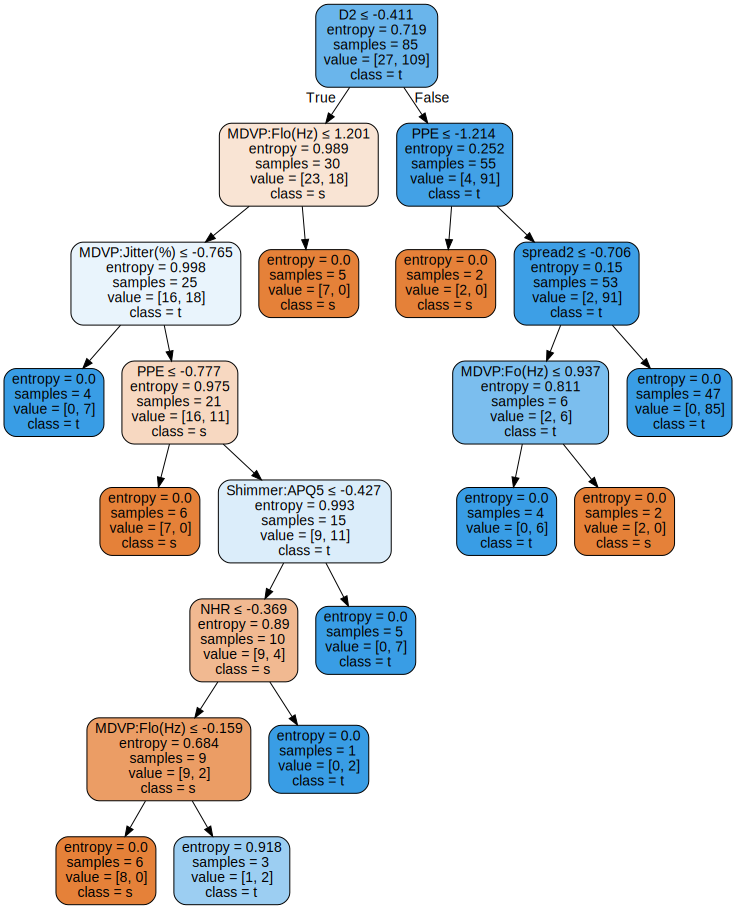

In [152]:
# Plotting the third decision tree of the Random Forest Classifier

Tree = tree.export_graphviz(model_rforest[2], out_file=None,feature_names=c_cols,class_names='status',filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(Tree)
graph

## --- ADABoost ---

In [153]:
from sklearn.ensemble import AdaBoostClassifier

DTC=tree.DecisionTreeClassifier(max_depth=2)
model_adaboost = AdaBoostClassifier(n_estimators=700, base_estimator=DTC ,learning_rate=0.3)

print(model_adaboost)

model_adaboost=model_adaboost.fit(X_train,y_train)
y_pred=model_adaboost.predict(X_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.3, n_estimators=700)


### Confusion Matrix and Classification Report

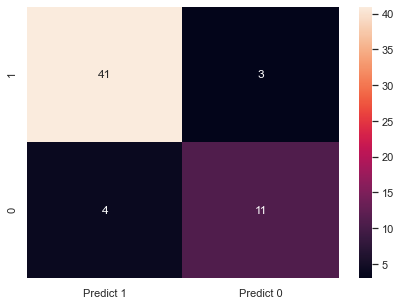

In [154]:
cm_ada_boost=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_ada_boost = pd.DataFrame(cm_ada_boost, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_ada_boost, annot=True)

In [155]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



In [156]:
accuracy_ada_boost = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_ada_boost = float(accuracy_ada_boost)*100

In [157]:
print('The Accuracy of the ADA Boost Classifier is :',accuracy_percentage_ada_boost,'%')

The Accuracy of the ADA Boost Classifier is : 88.0 %


In [158]:
score_ada_boost = model_adaboost.score(X_test,y_test)*100
print('The score of the ADA Boost classifier on the test data is: ',score_ada_boost,'%')

The score of the ADA Boost classifier on the test data is:  88.13559322033898 %


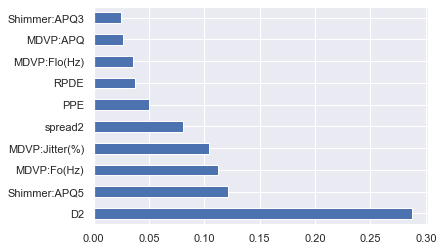

In [159]:
# Finding out the top 10 important features to make the predictions

feature_importances = pd.Series(model_adaboost.feature_importances_, index=c_cols)
feature_importances.nlargest(10).plot(kind='barh')

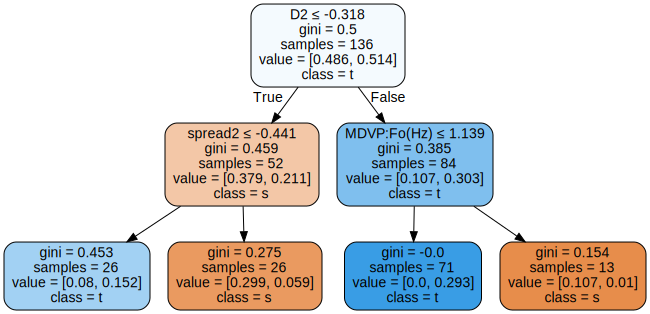

In [160]:
# PLotting 5th single Decision Tree from Adaboost

Tree = tree.export_graphviz(model_adaboost[4], out_file=None,feature_names=c_cols,class_names='status',filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(Tree)
graph

## --- XGBoost ---

In [161]:
from xgboost import XGBClassifier
model_xgboost=XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=500, objective='binary:logistic', booster='gbtree')

print(model_xgboost)

model_xgboost=model_xgboost.fit(X_train,y_train)
y_pred=model_xgboost.predict(X_test)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


### Confusion Matrix and Classification Report

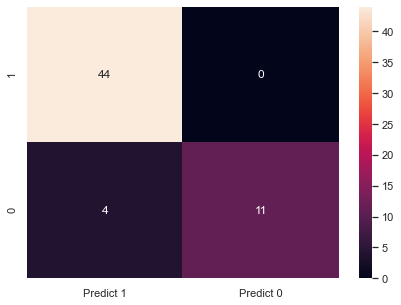

In [162]:
cm_xgboost=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_xgboost = pd.DataFrame(cm_xgboost, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_xgboost, annot=True)

In [163]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



In [164]:
accuracy_xgboost = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_xgboost = float(accuracy_xgboost)*100

In [165]:
print('The Accuracy of the XG Boost Classifier is :',accuracy_percentage_xgboost,'%')

The Accuracy of the XG Boost Classifier is : 93.0 %


In [166]:
score_xgboost = model_xgboost.score(X_test,y_test)*100
print('The score of the XG Boost classifier on the test data is: ',score_xgboost,'%')

The score of the XG Boost classifier on the test data is:  93.22033898305084 %


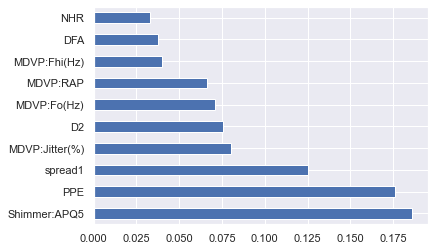

In [167]:
# Finding out the top 10 important features to make the predictions

feature_importances = pd.Series(model_xgboost.feature_importances_, index=c_cols)
feature_importances.nlargest(10).plot(kind='barh')

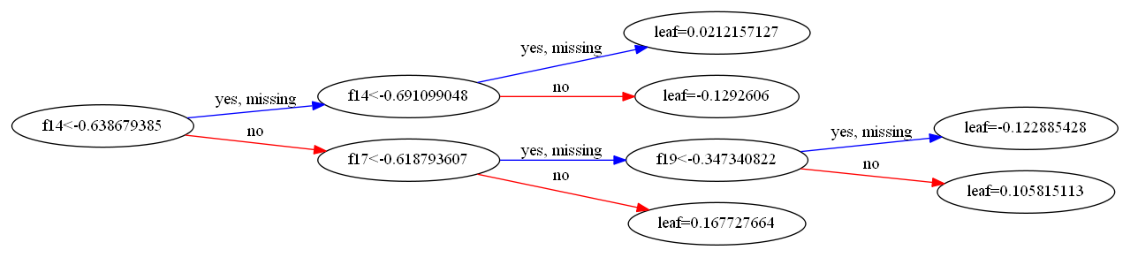

In [168]:
# Plotting the 13th decision tree that has been used in the XGBoost Classifier

from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(20, 13))
plot_tree(model_xgboost, num_trees=13, ax=ax,rankdir='LR')

## 8) Stacking Classifier using Logistic Regression as the meta-classifier

## --- STACKING CLASSIFIER ---

In [169]:
RANDOM_SEED = 9
lr = LogisticRegression(random_state=RANDOM_SEED) # meta-classifier

In [170]:
from sklearn.ensemble import StackingClassifier

# Creating a Stacking Classifier with the base learners as the estimators and the logistic regression model created as the meta-classifier
model_sclf = StackingClassifier(
    estimators=[('ABoost',model_adaboost),('rforest',model_rforest),('lgr',model_lgr),('dtree',model_dtree),
                ('knn',model_knn),('nb',model_nb),('svm',model_svm),('xgb',model_xgboost)], 
    final_estimator=lr)

In [171]:
print(model_sclf) # Printing the Standard Classifier Model

StackingClassifier(estimators=[('ABoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                   learning_rate=0.3,
                                                   n_estimators=700)),
                               ('rforest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=7,
                                                       n_estimators=1000)),
                               ('lgr',
                                LogisticRegression(C=1, solver='newton-cg')),
                               ('dtree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=8))...
                                              interaction_constraints='',
                                              learning_rate=0.2,
      

In [172]:
sclf=model_sclf.fit(X_train,y_train)
y_pred=sclf.predict(X_test)

### Confusion Matrix and Classification Report

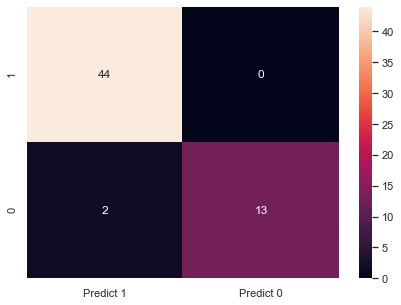

In [173]:
cm_sclf=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm_sclf = pd.DataFrame(cm_sclf, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_sclf, annot=True)

In [174]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59



In [175]:
accuracy_sclf = metrics.classification_report(y_test, y_pred).split()[-2]
accuracy_percentage_sclf = float(accuracy_sclf)*100

print('The Accuracy of the Stacking Classifier is :',accuracy_percentage_sclf,'%')

score_sclf = sclf.score(X_test,y_test)*100
print('The score of the Stacking classifier on the test data is: ',score_sclf,'%')

The Accuracy of the Stacking Classifier is : 97.0 %
The score of the Stacking classifier on the test data is:  96.61016949152543 %


## 9) Which is the best model??  

In [176]:
print('The Accuracy of the Logistic Regression model is :',accuracy_percentage_lgr,'%')
print('The Accuracy of the K-NN model is :',accuracy_percentage_knn,'%')
print('The Accuracy of the Naïve Bayes model is :',accuracy_percentage_nb,'%')
print('The Accuracy of the SVM model is :',accuracy_percentage_svm,'%')
print('The Accuracy of the Decision Tree model is :',accuracy_percentage_dtree,'%')
print('The Accuracy of the Random Forest model is :',accuracy_percentage_rforest,'%')
print('The Accuracy of the ADA Boost Classifier is :',accuracy_percentage_ada_boost,'%')
print('The Accuracy of the XG Boost Classifier is :',accuracy_percentage_xgboost,'%')
print('The Accuracy of the Stacking Classifier is :',accuracy_percentage_sclf,'%')

The Accuracy of the Logistic Regression model is : 87.0 %
The Accuracy of the K-NN model is : 95.0 %
The Accuracy of the Naïve Bayes model is : 81.0 %
The Accuracy of the SVM model is : 89.0 %
The Accuracy of the Decision Tree model is : 90.0 %
The Accuracy of the Random Forest model is : 93.0 %
The Accuracy of the ADA Boost Classifier is : 88.0 %
The Accuracy of the XG Boost Classifier is : 93.0 %
The Accuracy of the Stacking Classifier is : 97.0 %


In [177]:
Accuracy_df = pd.DataFrame(data=[
    ['Logistic Regression',accuracy_percentage_lgr],
    ['KNN',accuracy_percentage_knn],
    ['Naive Bayes',accuracy_percentage_nb],
    ['SVM',accuracy_percentage_svm],
    ['Decision Tree',accuracy_percentage_dtree],
    ['Random Forest',accuracy_percentage_rforest],
    ['ADA-Boost',accuracy_percentage_ada_boost],
    ['XG-Boost',accuracy_percentage_xgboost],
    ['Stacking Classifier',accuracy_percentage_sclf]],
    columns=['Model','Accuracy'])

In [178]:
style = sns.light_palette('green',as_cmap=True)
Accuracy = Accuracy_df.sort_values(by='Accuracy',ascending=False)
Accuracy = Accuracy.style.background_gradient(cmap=style)
Accuracy

,Model,Accuracy
8,Stacking Classifier,97.000000
1,KNN,95.000000
5,Random Forest,93.000000
7,XG-Boost,93.000000
4,Decision Tree,90.000000
3,SVM,89.000000
6,ADA-Boost,88.000000
0,Logistic Regression,87.000000
2,Naive Bayes,81.000000


### - We can see that Stacking Classifier has got the maximum accuracy.

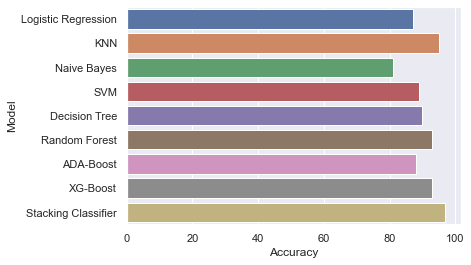

In [179]:
# Bar plot of the accuracies of the different classifier models
acc_bar = sns.barplot(x='Accuracy',y='Model',data=Accuracy_df)

In [180]:
''' Combining the predictions of the Stacking Classifier with the actual data set to compare the 
actual "status" with the "predicted status" ''' 

data_with_predictions = pd.DataFrame(X_test_with_names,columns=cols)
data_with_predictions['Status'] = y_test
data_with_predictions['Status predicted'] = y_pred

In [181]:
data_with_predictions.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Status,Status predicted
138,phon_R01_S33_5,112.239,126.609,104.095,0.00472,0.00004,0.00238,0.00290,0.00715,0.05643,...,0.02629,17.366,0.640945,0.701404,-5.634576,0.306014,2.419253,0.209191,1,1
16,phon_R01_S04_5,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,0.02047,...,0.01859,22.333,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164,1,1
155,phon_R01_S37_3,117.870,127.349,95.654,0.00647,0.00005,0.00356,0.00300,0.01067,0.03087,...,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256,1,1
96,phon_R01_S22_6,159.116,168.913,144.811,0.00342,0.00002,0.00178,0.00184,0.00535,0.03381,...,0.00852,22.663,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709,1,1
68,phon_R01_S18_3,143.533,162.215,65.809,0.01101,0.00008,0.00647,0.00467,0.01941,0.05384,...,0.04882,20.338,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580,1,1


# CONCLUSION :
## 1) We can clearly see that the performance of the "Stacking Classifier" model is much better than that of the other models.  
## 2) Reason being that the stacking classifier is a combination of many of the classification models, whose outputs are fed into the meta-classifier to make the final predictions.
## 3) This final meta-classifier model is a very powerful model that combines the output of all the base learners, that were already trained before.

# --------------------------------------------------------------------------------------------------------------